## Projekt Zaliczeniowy DATABOOTCAMP ING 
### Łukasz Tyrajski
### Temat 1 - przewidywanie cen nieruchomości

### 1. Import bibliotek

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#from matplotlib.pyplot import plot

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score

### 2. Wczytanie danych i ich obróbka
#### 2.1 wczytanie danych

In [2]:
data = pd.read_csv("ames2000_NAfix.csv")

####  2.1 Zamiana typów zmiennych o charakterze liczbowym przypisanych do kategorii opisowych

In [3]:
# Zamiana typów zmiennych o charakterze liczbowym przypisanych do kategorii opisowych

data[["Lot.Frontage"]] = pd.to_numeric(data["Lot.Frontage"], errors='coerce')
data[["Mas.Vnr.Area"]] = pd.to_numeric(data["Mas.Vnr.Area"], errors='coerce')
data[["BsmtFin.SF.1"]] = pd.to_numeric(data["BsmtFin.SF.1"], errors='coerce')
data[["BsmtFin.SF.2"]] = pd.to_numeric(data["BsmtFin.SF.2"], errors='coerce')
data[["Bsmt.Unf.SF"]] = pd.to_numeric(data["Bsmt.Unf.SF"], errors='coerce')
data[["Total.Bsmt.SF"]] = pd.to_numeric(data["Total.Bsmt.SF"], errors='coerce')
data[["X1st.Flr.SF"]] = pd.to_numeric(data["X1st.Flr.SF"], errors='coerce')
data[["X2nd.Flr.SF"]] = pd.to_numeric(data["X2nd.Flr.SF"], errors='coerce')
data[["Low.Qual.Fin.SF"]] = pd.to_numeric(data["Low.Qual.Fin.SF"], errors='coerce')
data[["Gr.Liv.Area"]] = pd.to_numeric(data["Gr.Liv.Area"], errors='coerce')
data[["Garage.Yr.Blt"]] = pd.to_numeric(data["Garage.Yr.Blt"], errors='coerce')
data[["Garage.Area"]] = pd.to_numeric(data["Garage.Area"], errors='coerce')
data[["Wood.Deck.SF"]] = pd.to_numeric(data["Wood.Deck.SF"], errors='coerce')


#### 2.2 Manualna obróbka wybranych zmiennych kategorycznych na dane liczbowe

In [4]:
data['Lot.Shape'] = data['Lot.Shape'].replace(['Reg', 'IR1', 'IR2', 'IR3'], [4,3,2,1])
data['Utilities'] = data['Utilities'].replace(['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], [4,3,2,1])
data['Land.Slope'] = data['Land.Slope'].replace(['Gtl', 'Mod', 'Sev'], [3,2,1])
data['Exter.Qual'] = data['Exter.Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1])
data['Exter.Cond'] = data['Exter.Cond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1])

data['Bsmt.Qual'] = data['Bsmt.Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [6,5,4,3,2,1])
data[['Bsmt.Qual']] = pd.to_numeric(data['Bsmt.Qual'], errors='coerce')

data['Bsmt.Exposure'] = data['Bsmt.Exposure'].replace(['Gd', 'Mn', 'No', 'NA'], [3,2,1,0])
data[['Bsmt.Exposure']] = pd.to_numeric(data['Bsmt.Exposure'], errors='coerce')

data['BsmtFin.Type.1'] = data['BsmtFin.Type.1'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [6,5,4,3,2,1,0])
data[['BsmtFin.Type.1']] = pd.to_numeric(data['BsmtFin.Type.1'], errors='coerce')

data['BsmtFin.Type.2'] = data['BsmtFin.Type.2'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [6,5,4,3,2,1,0])
data[['BsmtFin.Type.2']] = pd.to_numeric(data['BsmtFin.Type.2'], errors='coerce')

data['Heating.QC'] = data['Heating.QC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1])
data['Electrical'] = data['Electrical'].replace(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], [ 5,4,3,2,1])
data['Kitchen.Qual'] = data['Kitchen.Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1])
data['Functional'] = data['Functional'].replace(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], [7,6,5,4,3,2,1,0])

data['Fireplace.Qu'] = data['Fireplace.Qu'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0])
data[['Fireplace.Qu']] = pd.to_numeric(data['Fireplace.Qu'], errors='coerce')

data['Garage.Finish'] = data['Garage.Finish'].replace(['Fin', 'RFn', 'Unf', 'NA'], [3,2,1,0]) 
data[['Garage.Finish']] = pd.to_numeric(data['Garage.Finish'], errors='coerce')

data['Garage.Qual'] = data['Garage.Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0])
data[['Garage.Qual']] = pd.to_numeric(data['Garage.Qual'], errors='coerce')

data['Garage.Cond'] = data['Garage.Cond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0])
data[['Garage.Cond']] = pd.to_numeric(data['Garage.Cond'], errors='coerce')

data['Paved.Drive'] = data['Paved.Drive'].replace(['Y','P', 'N'], [2,1,0])

data['Pool.QC'] = data['Pool.QC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'NA'], [4,3,2,1,0])
data[['Pool.QC']] = pd.to_numeric(data['Pool.QC'], errors='coerce')

data['Fence'] = data['Fence'].replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'], [4,3,2,1,0])
data[['Fence']] = pd.to_numeric(data['Fence'], errors='coerce')


In [5]:
# sprawdzenie typów danych

In [6]:
print(data.dtypes)

MS.SubClass         int64
MS.Zoning          object
Lot.Frontage      float64
Lot.Area            int64
Street             object
Alley              object
Lot.Shape           int64
Land.Contour       object
Utilities          object
Lot.Config         object
Land.Slope          int64
Neighborhood       object
Condition.1        object
Condition.2        object
Bldg.Type          object
House.Style        object
Overall.Qual        int64
Overall.Cond        int64
Year.Built          int64
Year.Remod.Add      int64
Roof.Style         object
Roof.Matl          object
Exterior.1st       object
Exterior.2nd       object
Mas.Vnr.Type       object
Mas.Vnr.Area      float64
Exter.Qual         object
Exter.Cond         object
Foundation         object
Bsmt.Qual         float64
                   ...   
Bedroom.AbvGr       int64
Kitchen.AbvGr       int64
Kitchen.Qual       object
TotRms.AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace.Qu      float64
Garage.Type 

#### 2.3 Ocena zmiennych korelacji i przydatności - zmienne związae z piwnicą

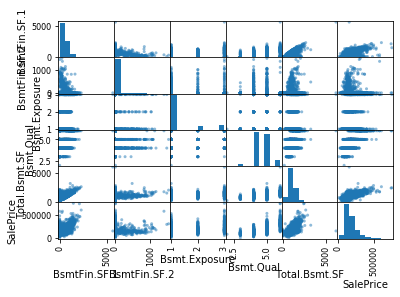

In [7]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[['BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Exposure', 'Bsmt.Qual', "Total.Bsmt.SF", "SalePrice" ]])

plt.rcParams["figure.figsize"] = (40,30)
plt.rcParams.update({'font.size': 30})

plt.show()

# na oko brak jednoznacznej korelacji pomiędzy zmiennymi - nie licząc korelacji zmiennych z Total.Bsmt.SF 

In [8]:
## Liczenie zer i nan w poszczególnych kolumnach

def print_data(data):
   for column_name in data.columns:
       checked_column = data[str(column_name)].astype(str)
       count_zeros = 0
       count_nan = 0
       for entry in range(checked_column.size):
           if checked_column[entry] == 'nan':
               count_nan = count_nan + 1
           if checked_column[entry] == '0':
               count_zeros = count_zeros + 1
       nan_percentage = count_nan / data.shape[0] * 100
       zeros_percentage = count_zeros / data.shape[0] * 100
       print('------------############------------', str(column_name),
            '\nnan:', count_nan, '-->', np.round(nan_percentage, 2), '%',
             '\nZeros:', count_zeros, '-->', np.round(zeros_percentage, 2), '%',
             #'\nUnique:', np.unique(checked_column).shape[0],
             #'\n', np.unique(checked_column), '\n\n'
            )

In [9]:
print_data(data)

------------############------------ MS.SubClass 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ MS.Zoning 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ Lot.Frontage 
nan: 334 --> 16.7 % 
Zeros: 0 --> 0.0 %
------------############------------ Lot.Area 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ Street 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ Alley 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ Lot.Shape 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ Land.Contour 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ Utilities 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ Lot.Config 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ Land.Slope 
nan: 0 --> 0.0 % 
Zeros: 0 --> 0.0 %
------------############------------ Neighborhood 
nan: 0 --

In [10]:
## ze względu na bardzo dużą liczbę braków danych arbitralnie usuwamy część kolumn

data.drop([
    "Low.Qual.Fin.SF",
    "Bsmt.Full.Bath",
    "Bsmt.Half.Bath",
    "Half.Bath",
    "Enclosed.Porch",
    "X3Ssn.Porch",
    "Pool.QC",
    "Fence",
    "Misc.Val",
    "Pool.Area"
], 
    
    axis =1, inplace= True)

#Pool.Arenta - zostawiamy gdyż niesie informacje o tym czy jest basen czy też nie ma

In [11]:
X = data.loc[:, data.columns != 'SalePrice']
y = data[['SalePrice']]

In [12]:
## podzaił danych na testowe i na uczące się 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 600)

### Tworzenie klas do zbiorczego oczyszczania danych

In [13]:
# Tworzenie klas do zbiorczego oczyszczania danych

from sklearn.base import TransformerMixin, BaseEstimator

class ColumnsSelector(TransformerMixin, BaseEstimator):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y = None):
        return self
    
    def transform (self, X):
        return X[self.columns]
    
class ColumnsSelectorByType(TransformerMixin, BaseEstimator):
    def __init__(self, col_type):
        self.col_type = col_type
    
    def fit(self, X, y = None):
        return self
    
    def transform (self, X):
        return X.select_dtypes(self.col_type)
        
from sklearn.base import TransformerMixin, BaseEstimator


class MissingIndicatorRare(TransformerMixin, BaseEstimator):
    def __init__(self, treashold):
        self.treashold = treashold
    
    def fit(self, X, y = None):
        self.columns_with_many_nans =\
            np.where(X.isna().sum(0)/X.shape[0] >= self.treashold)[0]
        return self
    
    def transform (self, X):
        X_new = X.copy()
        X_new.iloc[:,self.columns_with_many_nans]=\
            X.iloc[:, self.columns_with_many_nans].isna()
        return X_new

### tworzenie pipeline do oczyszczania danych korzystająceg ze stworzonych klas

In [14]:
#tworzenie pipeline do oczyszczania danych korzystająceg ze stworzonych klas

from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline

pipeline = FeatureUnion([
    ("branch1", make_pipeline(ColumnsSelectorByType([np.number]), 
                             SimpleImputer(strategy = "mean"), 
                             StandardScaler())),
    ("branch2", make_pipeline(ColumnsSelectorByType(object),
                             MissingIndicatorRare(0.4),
                             SimpleImputer(strategy = "most_frequent"),
                             OneHotEncoder(sparse=False, handle_unknown='ignore')))        
])

### 3.1 Pierwszy model - regresja liniowa

In [15]:
model1 = make_pipeline(pipeline, LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))
model1.fit(X_train, y_train)

from sklearn.metrics import r2_score

r2_model1 = r2_score(y_test,model1.predict(X_test))
r2_model1

# Ponieważ zmienna celu jest liczbą to do oceny predykcji modelu używamy np. miary dopasowania R2


-1.385708825929493e+19

### 3.2 Regresja logistyczna

In [16]:
model2 = make_pipeline(pipeline, SelectFromModel(LogisticRegression(),0.5), LogisticRegression())
model2.fit(X_train, y_train)

from sklearn.metrics import r2_score



r2_model2 = r2_score(y_test,model2.predict(X_test))
r2_model2

#from sklearn.metrics import explained_variance_score
#explained_variance_score(y_test,model2.predict(X_test))


/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/spark/miniconda3/lib/python3.7/site-packages

0.6507370164583357

### 3.3 Model "Lasso" rodzaj regresji liniowej 

In [17]:
from sklearn.linear_model import Lasso

model3 = make_pipeline(pipeline, Lasso(alpha=0.4, fit_intercept=True))
model3.fit(X_train, y_train)

r2_model3 = r2_score(y_test,model3.predict(X_test))
r2_model3


/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50104691544.876526, tolerance: 850561396.9513985
  positive)


0.9063514680364035

In [18]:
xxx =model3.predict(X_test)
xxx = pd.DataFrame(xxx)
type(xxx)

pandas.core.frame.DataFrame

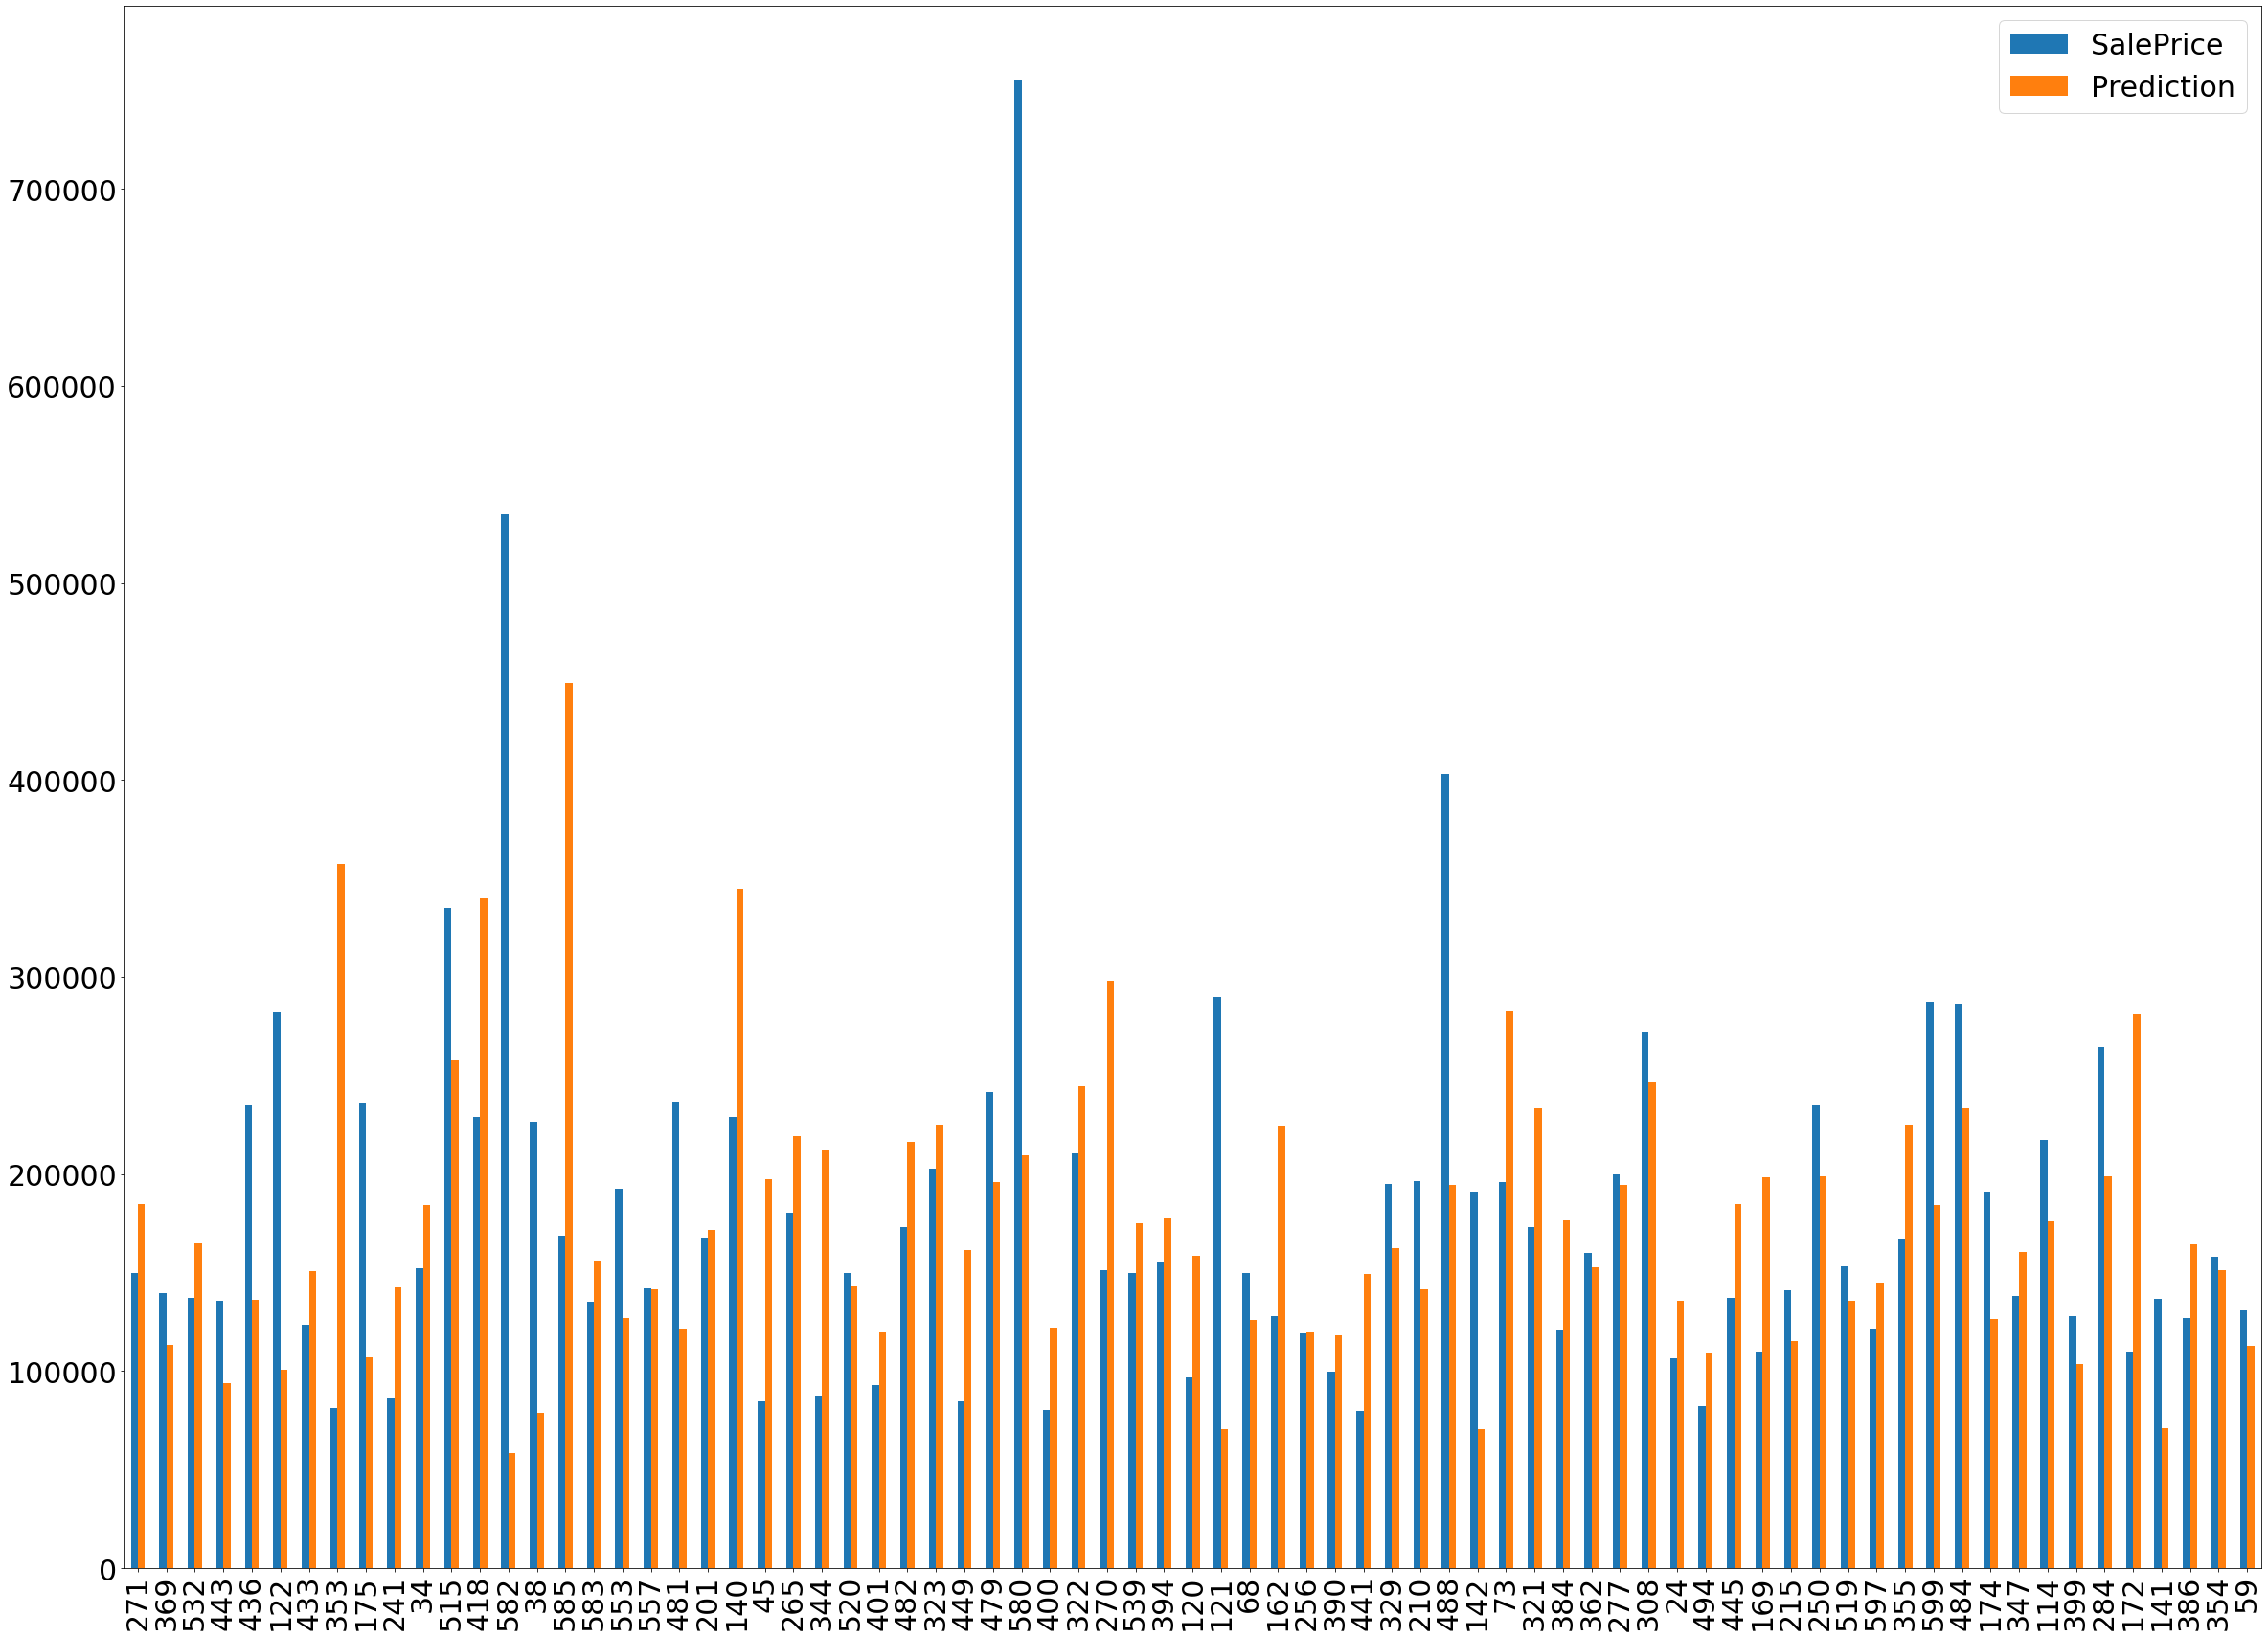

In [19]:
# Wykres porównujący dane o cenach z predykcją na podstawiu modelu lasso

porownanie = y_test.join(xxx.round(2), how = "inner")
porownanie2 = porownanie.iloc[
    :75]

porownanie2.columns = ['SalePrice', 'Prediction']
porownanie2.plot.bar()

plt.show(50)

## 3.4 Model Gradient Boosting 

In [20]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.2, loss = 'ls')

In [21]:
model4 = make_pipeline(pipeline, clf)
model4.fit(X_train, y_train)

r2_model4 = r2_score(y_test,model4.predict(X_test))
r2_model4



/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9143876077280189

In [35]:
xxx2 =model3.predict(X_test)
xxx2 = pd.DataFrame(xxx2)
type(xxx2)

pandas.core.frame.DataFrame

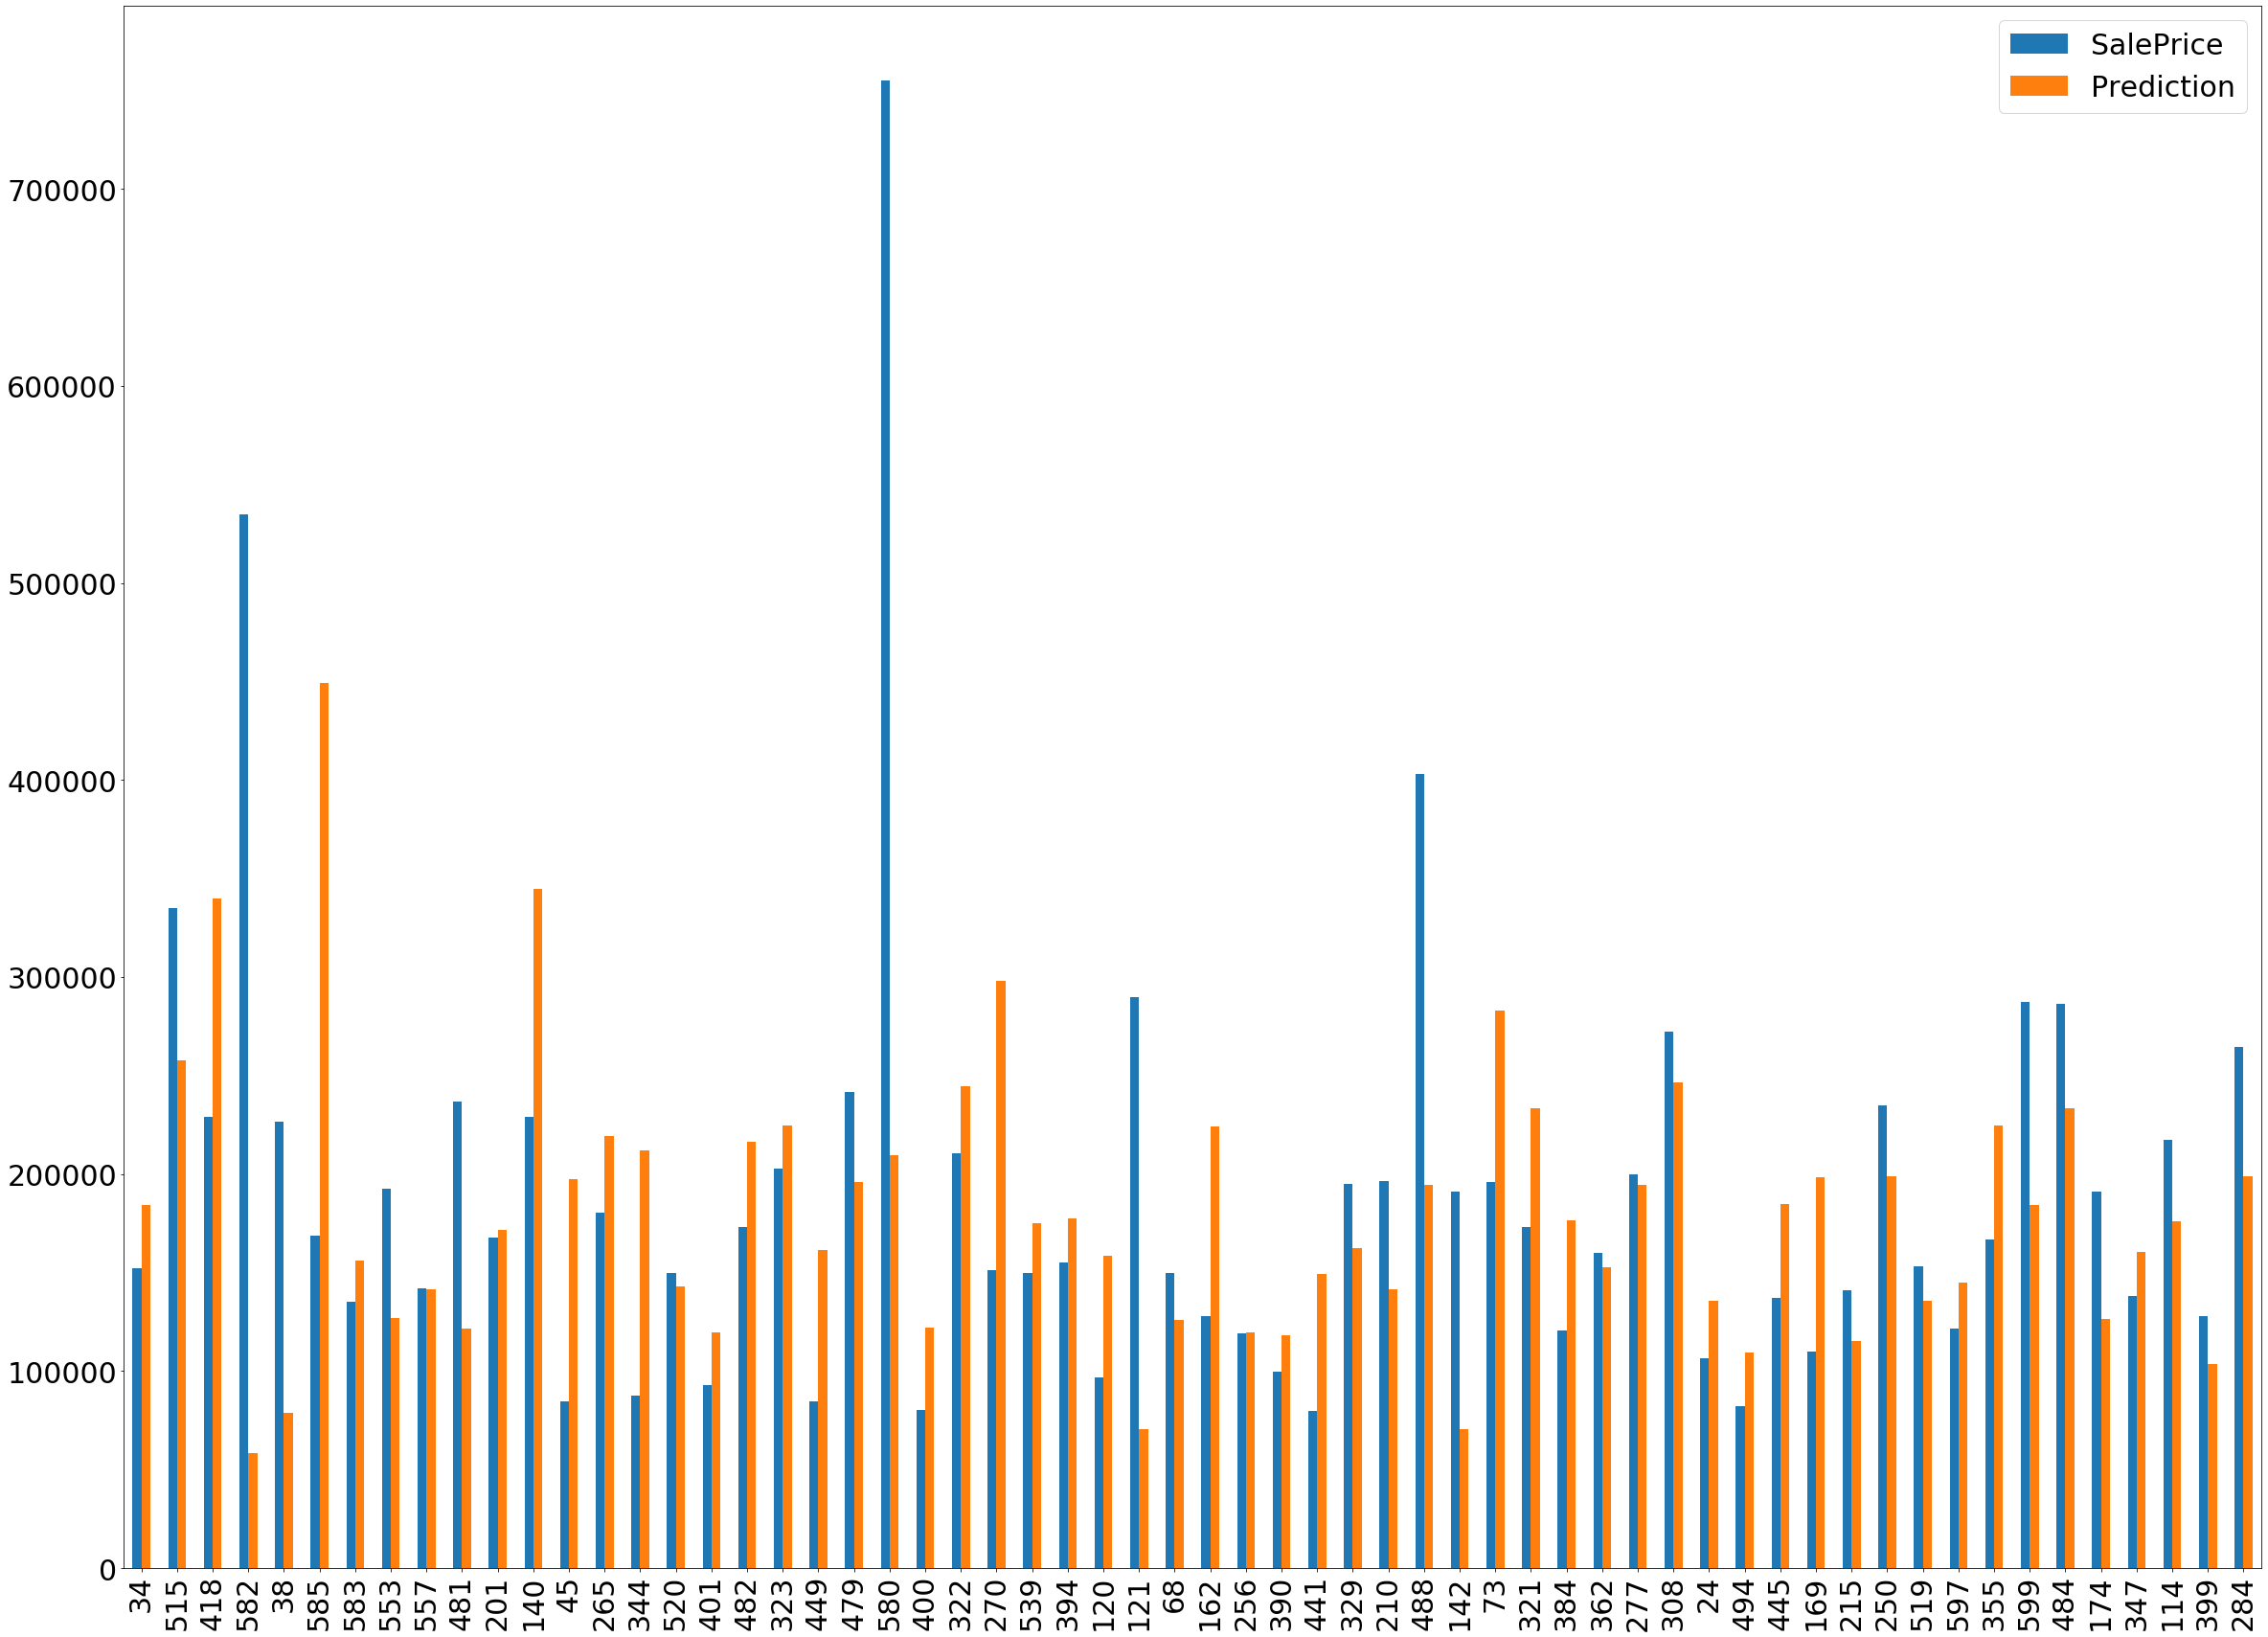

In [36]:
porownanie = y_test.join(xxx2.round(2), how = "inner")
porownanie2 = porownanie.iloc[10:70]
porownanie2.columns = ['SalePrice', 'Prediction']

porownanie2.plot.bar()
plt.show(10)


## Tabelka DataFrame z porównaniem danych


In [37]:
wyniki = pd.DataFrame(np.array([[r2_model1, r2_model2, r2_model3,r2_model4]]),
...                    columns=['prosta regresja liniowa', 'regresja logistyczna', 'regresja liniowa - metoda Lasso', 
                                'Gradinet Boosting'],
                     index = ["R2"])

In [38]:
wyniki

,prosta regresja liniowa,regresja logistyczna,regresja liniowa - metoda Lasso,Gradinet Boosting
R2,-1.385709e+19,0.650737,0.906351,0.914388


##### Komentarz: Wyniki dla regresjii linoiwej bardzo słabe - wynika to w znacznej mierze ze zbyt dużej ilości zmiennych; metoda Lasso daje już sobie radę z wczytanym zbiorem danych - mimo realnie ich słabej obróbki ; Grid Search optymalizacja modeli/pipelinów gryzie się z FutureUnion i nie potrafiłem zgrać tych dwóch elementów razem; do Grid Search osobny mały model

## 4. Obróbka danych bez użycia Future Union w celu zaprezentowania metody Grid Search

In [41]:
data2 = pd.read_csv("ames2000_NAfix.csv")

# Zamiana typów zmiennych o charakterze liczbowym przypisanych do kategorii opisowych

data2[["Lot.Frontage"]] = pd.to_numeric(data2["Lot.Frontage"], errors='coerce')
data2[["Mas.Vnr.Area"]] = pd.to_numeric(data2["Mas.Vnr.Area"], errors='coerce')
data2[["BsmtFin.SF.1"]] = pd.to_numeric(data2["BsmtFin.SF.1"], errors='coerce')
data2[["BsmtFin.SF.2"]] = pd.to_numeric(data2["BsmtFin.SF.2"], errors='coerce')
data2[["Bsmt.Unf.SF"]] = pd.to_numeric(data2["Bsmt.Unf.SF"], errors='coerce')
data2[["Total.Bsmt.SF"]] = pd.to_numeric(data2["Total.Bsmt.SF"], errors='coerce')
data2[["X1st.Flr.SF"]] = pd.to_numeric(data2["X1st.Flr.SF"], errors='coerce')
data2[["X2nd.Flr.SF"]] = pd.to_numeric(data2["X2nd.Flr.SF"], errors='coerce')
data2[["Low.Qual.Fin.SF"]] = pd.to_numeric(data2["Low.Qual.Fin.SF"], errors='coerce')
data2[["Gr.Liv.Area"]] = pd.to_numeric(data2["Gr.Liv.Area"], errors='coerce')
data2[["Garage.Yr.Blt"]] = pd.to_numeric(data2["Garage.Yr.Blt"], errors='coerce')
data2[["Garage.Area"]] = pd.to_numeric(data2["Garage.Area"], errors='coerce')
data2[["Wood.Deck.SF"]] = pd.to_numeric(data2["Wood.Deck.SF"], errors='coerce')

# zamiana zmiennych kategorycznych na słowniki

data2['Lot.Shape'] = data2['Lot.Shape'].replace(['Reg', 'IR1', 'IR2', 'IR3'], [4,3,2,1])
data2['Utilities'] = data2['Utilities'].replace(['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], [4,3,2,1])
data2['Land.Slope'] = data2['Land.Slope'].replace(['Gtl', 'Mod', 'Sev'], [3,2,1])
data2['Exter.Qual'] = data2['Exter.Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1])
data2['Exter.Cond'] = data2['Exter.Cond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1])

data2['Bsmt.Qual'] = data2['Bsmt.Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [6,5,4,3,2,1])
data2[['Bsmt.Qual']] = pd.to_numeric(data2['Bsmt.Qual'], errors='coerce')

data2['Bsmt.Exposure'] = data2['Bsmt.Exposure'].replace(['Gd', 'Mn', 'No', 'NA'], [3,2,1,0])
data2[['Bsmt.Exposure']] = pd.to_numeric(data2['Bsmt.Exposure'], errors='coerce')

data2['BsmtFin.Type.1'] = data2['BsmtFin.Type.1'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [6,5,4,3,2,1,0])
data2[['BsmtFin.Type.1']] = pd.to_numeric(data2['BsmtFin.Type.1'], errors='coerce')

data2['BsmtFin.Type.2'] = data2['BsmtFin.Type.2'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [6,5,4,3,2,1,0])
data2[['BsmtFin.Type.2']] = pd.to_numeric(data2['BsmtFin.Type.2'], errors='coerce')

data2['Heating.QC'] = data2['Heating.QC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1])
data2['Electrical'] = data2['Electrical'].replace(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], [ 5,4,3,2,1])
data2['Kitchen.Qual'] = data2['Kitchen.Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1])
data2['Functional'] = data2['Functional'].replace(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], [7,6,5,4,3,2,1,0])

data2['Fireplace.Qu'] = data2['Fireplace.Qu'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0])
data2[['Fireplace.Qu']] = pd.to_numeric(data2['Fireplace.Qu'], errors='coerce')

data2['Garage.Finish'] = data2['Garage.Finish'].replace(['Fin', 'RFn', 'Unf', 'NA'], [3,2,1,0]) 
data2[['Garage.Finish']] = pd.to_numeric(data2['Garage.Finish'], errors='coerce')

data2['Garage.Qual'] = data2['Garage.Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0])
data2[['Garage.Qual']] = pd.to_numeric(data2['Garage.Qual'], errors='coerce')

data2['Garage.Cond'] = data2['Garage.Cond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0])
data2[['Garage.Cond']] = pd.to_numeric(data2['Garage.Cond'], errors='coerce')

data2['Paved.Drive'] = data2['Paved.Drive'].replace(['Y','P', 'N'], [2,1,0])

data2['Pool.QC'] = data2['Pool.QC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'NA'], [4,3,2,1,0])
data2[['Pool.QC']] = pd.to_numeric(data2['Pool.QC'], errors='coerce')

data2['Fence'] = data2['Fence'].replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'], [4,3,2,1,0])
data2[['Fence']] = pd.to_numeric(data2['Fence'], errors='coerce')


# tworzenie zmiennych zero jedynkowych dla zmiennych kategorycznych + usuwanie orginalnych zmiennych - 
# ponieważ znamy dokładnw słowniki danych to uprawniona jest zamiana zmiennych kategorycznych przed podziałem na dane treningowe i testowe

pd.concat([pd.get_dummies(data=data2, columns=["Street", 
                                               "MS.Zoning",
                                               "Alley",
                                               "Lot.Shape",
                                               "Land.Contour",
                                               "Utilities",
                                               "Lot.Config",
                                               "Land.Slope",
                                               "Neighborhood",
                                               "Condition.1", 
                                               "Condition.2",
                                               "Bldg.Type",
                                               "House.Style",
                                               "Roof.Style",
                                               "Roof.Matl",
                                               "Mas.Vnr.Type",
                                               "Exter.Qual",
                                               "Exter.Cond",
                                               "Foundation",
                                               "Bsmt.Qual",
                                               "Bsmt.Cond",
                                               "Bsmt.Exposure",
                                               "BsmtFin.Type.1",
                                               "Kitchen.Qual",
                                               "Functional",
                                               "Fireplace.Qu",
                                               "Garage.Type",
                                               "Garage.Finish",
                                               "Garage.Cars",
                                               "Garage.Qual",
                                               "Garage.Cond",
                                               "Paved.Drive",
                                               "Pool.QC",
                                               "Fence", 
                                               "Misc.Feature",
                                               "Sale.Type",
                                               "Sale.Condition",
                                               "Exterior.1st",
                                               "Exterior.2nd",
                                               "BsmtFin.Type.2",
                                               "Heating",
                                               "Heating.QC",
                                               "Central.Air",
                                               "Electrical",
                                               "Bsmt.Full.Bath",
                                               "Bsmt.Half.Bath",
                                              
                                              
                                              ])], axis=1, keys=data2.columns)







data2.drop(["Street", 
                                               "MS.Zoning",
                                               "Alley",
                                               "Lot.Shape",
                                               "Land.Contour",
                                               "Utilities",
                                               "Lot.Config",
                                               "Land.Slope",
                                               "Neighborhood",
                                               "Condition.1", 
                                               "Condition.2",
                                               "Bldg.Type",
                                               "House.Style",
                                               "Roof.Style",
                                               "Roof.Matl",
                                               "Mas.Vnr.Type",
                                               "Exter.Qual",
                                               "Exter.Cond",
                                               "Foundation",
                                               "Bsmt.Qual",
                                               "Bsmt.Cond",
                                               "Bsmt.Exposure",
                                               "BsmtFin.Type.1",
                                               "Kitchen.Qual",
                                               "Functional",
                                               "Fireplace.Qu",
                                               "Garage.Type",
                                               "Garage.Finish",
                                               "Garage.Cars",
                                               "Garage.Qual",
                                               "Garage.Cond",
                                               "Paved.Drive",
                                               "Pool.QC",
                                               "Fence", 
                                               "Misc.Feature",
                                               "Sale.Type",
                                               "Sale.Condition",
                                               "Exterior.1st",
                                               "Exterior.2nd",
                                               "BsmtFin.Type.2",
                                               "Heating",
                                               "Heating.QC",
                                               "Central.Air",
                                               "Electrical",
                                               "Bsmt.Full.Bath",
                                               "Bsmt.Half.Bath",
            
            
            ],  
    axis=1, inplace=True)


In [26]:
#enc = OneHotEncoder(handle_unknown='ignore', categorical_features=[0], sparse=False)
#enc.fit(data2)
#enc.transform(data2One)

In [42]:
X2 = data2.loc[:, data2.columns != 'SalePrice']
y2 = data2[['SalePrice']]


In [43]:
# Podział danyxh na część testową i uczącą się  


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 600)


In [44]:
# uzupełnienie braków dla danych treningowych

X_train2['MS.SubClass'].fillna((X_train2['MS.SubClass'].mean()), inplace=True)
X_train2['Lot.Frontage'].fillna((X_train2['Lot.Frontage'].mean()), inplace=True)
X_train2['Lot.Area'].fillna((X_train2['Lot.Area'].mean()), inplace=True)
X_train2['Overall.Qual'].fillna((X_train2['Overall.Qual'].mean()), inplace=True)
X_train2['Overall.Cond'].fillna((X_train2['Overall.Cond'].mean()), inplace=True)
X_train2['Year.Built'].fillna((X_train2['Year.Built'].mean()), inplace=True)

X_train2['Year.Remod.Add'].fillna((X_train2['Year.Remod.Add'].mean()), inplace=True)
X_train2['Mas.Vnr.Area'].fillna((X_train2['Mas.Vnr.Area'].mean()), inplace=True)
X_train2['BsmtFin.SF.1'].fillna((X_train2['BsmtFin.SF.1'].mean()), inplace=True)
X_train2['BsmtFin.SF.2'].fillna((X_train2['BsmtFin.SF.2'].mean()), inplace=True)

X_train2['Bsmt.Unf.SF'].fillna((X_train2['Bsmt.Unf.SF'].mean()), inplace=True)
X_train2['Total.Bsmt.SF'].fillna((X_train2['Total.Bsmt.SF'].mean()), inplace=True)
X_train2['X1st.Flr.SF'].fillna((X_train2['X1st.Flr.SF'].mean()), inplace=True)
X_train2['X2nd.Flr.SF'].fillna((X_train2['X2nd.Flr.SF'].mean()), inplace=True)

X_train2['Low.Qual.Fin.SF'].fillna((X_train2['Low.Qual.Fin.SF'].mean()), inplace=True)
X_train2['Gr.Liv.Area'].fillna((X_train2['Gr.Liv.Area'].mean()), inplace=True)
X_train2['Full.Bath'].fillna((X_train2['Full.Bath'].mean()), inplace=True)
X_train2['Half.Bath'].fillna((X_train2['Half.Bath'].mean()), inplace=True)

X_train2['Bedroom.AbvGr'].fillna((X_train2['Bedroom.AbvGr'].mean()), inplace=True)
X_train2['Kitchen.AbvGr'].fillna((X_train2['Kitchen.AbvGr'].mean()), inplace=True)
X_train2['TotRms.AbvGrd'].fillna((X_train2['TotRms.AbvGrd'].mean()), inplace=True)
X_train2['Fireplaces'].fillna((X_train2['Fireplaces'].mean()), inplace=True)

X_train2['Garage.Yr.Blt'].fillna((X_train2['Garage.Yr.Blt'].mean()), inplace=True)
X_train2['Garage.Area'].fillna((X_train2['Garage.Area'].mean()), inplace=True)
X_train2['Wood.Deck.SF'].fillna((X_train2['Wood.Deck.SF'].mean()), inplace=True)
X_train2['Open.Porch.SF'].fillna((X_train2['Open.Porch.SF'].mean()), inplace=True)

X_train2['Enclosed.Porch'].fillna((X_train2['Enclosed.Porch'].mean()), inplace=True)
X_train2['X3Ssn.Porch'].fillna((X_train2['X3Ssn.Porch'].mean()), inplace=True)
X_train2['Screen.Porch'].fillna((X_train2['Screen.Porch'].mean()), inplace=True)
X_train2['Pool.Area'].fillna((X_train2['Pool.Area'].mean()), inplace=True)

X_train2['Misc.Val'].fillna((X_train2['Misc.Val'].mean()), inplace=True)
X_train2['Mo.Sold'].fillna((X_train2['Mo.Sold'].mean()), inplace=True)
X_train2['Yr.Sold'].fillna((X_train2['Yr.Sold'].mean()), inplace=True)

#skalowanie danych

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)

/home/spark/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [45]:
print(data2.dtypes)

MS.SubClass          int64
Lot.Frontage       float64
Lot.Area             int64
Overall.Qual         int64
Overall.Cond         int64
Year.Built           int64
Year.Remod.Add       int64
Mas.Vnr.Area       float64
BsmtFin.SF.1       float64
BsmtFin.SF.2       float64
Bsmt.Unf.SF        float64
Total.Bsmt.SF      float64
X1st.Flr.SF          int64
X2nd.Flr.SF          int64
Low.Qual.Fin.SF      int64
Gr.Liv.Area          int64
Full.Bath            int64
Half.Bath            int64
Bedroom.AbvGr        int64
Kitchen.AbvGr        int64
TotRms.AbvGrd        int64
Fireplaces           int64
Garage.Yr.Blt      float64
Garage.Area        float64
Wood.Deck.SF         int64
Open.Porch.SF        int64
Enclosed.Porch       int64
X3Ssn.Porch          int64
Screen.Porch         int64
Pool.Area            int64
Misc.Val             int64
Mo.Sold              int64
Yr.Sold              int64
SalePrice            int64
dtype: object


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso


pipe = Pipeline([("selector", SelectFromModel(LogisticRegression(), 0.3)), 
                 ("model", Lasso())])

param_grid = {"selector__threshold": [0.01, 0.1, 0.15, 0.3, 0.45, 0.69]}

gs = GridSearchCV(pipe, param_grid)
gs.fit(X_train2, y_train2)

/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/ho

/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/spark/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1271530820.9398193, tolerance: 558365664.8745794
  

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('selector',
                                        SelectFromModel(estimator=LogisticRegression(C=1.0,
                                                                                     class_weight=None,
                                                                                     dual=False,
                                                                                     fit_intercept=True,
                                                                                     intercept_scaling=1,
                                                                                     l1_ratio=None,
                                                                                     max_iter=100,
                                                                                     multi_class='warn',
                                      

In [73]:
gs.best_params_

{'selector__threshold': 0.01}

In [74]:
# osobna obróbka dnahych testowych

X_test2['MS.SubClass'].fillna((X_test2['MS.SubClass'].mean()), inplace=True)
X_test2['Lot.Frontage'].fillna((X_test2['Lot.Frontage'].mean()), inplace=True)
X_test2['Lot.Area'].fillna((X_test2['Lot.Area'].mean()), inplace=True)
X_test2['Overall.Qual'].fillna((X_test2['Overall.Qual'].mean()), inplace=True)
X_test2['Overall.Cond'].fillna((X_test2['Overall.Cond'].mean()), inplace=True)
X_test2['Year.Built'].fillna((X_test2['Year.Built'].mean()), inplace=True)

X_test2['Year.Remod.Add'].fillna((X_test2['Year.Remod.Add'].mean()), inplace=True)
X_test2['Mas.Vnr.Area'].fillna((X_test2['Mas.Vnr.Area'].mean()), inplace=True)
X_test2['BsmtFin.SF.1'].fillna((X_test2['BsmtFin.SF.1'].mean()), inplace=True)
X_test2['BsmtFin.SF.2'].fillna((X_test2['BsmtFin.SF.2'].mean()), inplace=True)

X_test2['Bsmt.Unf.SF'].fillna((X_test2['Bsmt.Unf.SF'].mean()), inplace=True)
X_test2['Total.Bsmt.SF'].fillna((X_test2['Total.Bsmt.SF'].mean()), inplace=True)
X_test2['X1st.Flr.SF'].fillna((X_test2['X1st.Flr.SF'].mean()), inplace=True)
X_test2['X2nd.Flr.SF'].fillna((X_test2['X2nd.Flr.SF'].mean()), inplace=True)

X_test2['Low.Qual.Fin.SF'].fillna((X_test2['Low.Qual.Fin.SF'].mean()), inplace=True)
X_test2['Gr.Liv.Area'].fillna((X_test2['Gr.Liv.Area'].mean()), inplace=True)
X_test2['Full.Bath'].fillna((X_test2['Full.Bath'].mean()), inplace=True)
X_test2['Half.Bath'].fillna((X_test2['Half.Bath'].mean()), inplace=True)

X_test2['Bedroom.AbvGr'].fillna((X_test2['Bedroom.AbvGr'].mean()), inplace=True)
X_test2['Kitchen.AbvGr'].fillna((X_test2['Kitchen.AbvGr'].mean()), inplace=True)
X_test2['TotRms.AbvGrd'].fillna((X_test2['TotRms.AbvGrd'].mean()), inplace=True)
X_test2['Fireplaces'].fillna((X_test2['Fireplaces'].mean()), inplace=True)

X_test2['Garage.Yr.Blt'].fillna((X_test2['Garage.Yr.Blt'].mean()), inplace=True)
X_test2['Garage.Area'].fillna((X_test2['Garage.Area'].mean()), inplace=True)
X_test2['Wood.Deck.SF'].fillna((X_test2['Wood.Deck.SF'].mean()), inplace=True)
X_test2['Open.Porch.SF'].fillna((X_test2['Open.Porch.SF'].mean()), inplace=True)

X_test2['Enclosed.Porch'].fillna((X_test2['Enclosed.Porch'].mean()), inplace=True)
X_test2['X3Ssn.Porch'].fillna((X_test2['X3Ssn.Porch'].mean()), inplace=True)
X_test2['Screen.Porch'].fillna((X_test2['Screen.Porch'].mean()), inplace=True)
X_test2['Pool.Area'].fillna((X_test2['Pool.Area'].mean()), inplace=True)

X_test2['Misc.Val'].fillna((X_test2['Misc.Val'].mean()), inplace=True)
X_test2['Mo.Sold'].fillna((X_test2['Mo.Sold'].mean()), inplace=True)
X_test2['Yr.Sold'].fillna((X_test2['Yr.Sold'].mean()), inplace=True)

#skalowanie danych testowych

scaler = StandardScaler()
X_test2 = scaler.fit_transform(X_test2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
r2_model5_grid = r2_score(y_test2,gs.predict(X_test2))
r2_model5_grid